## Taproot Foundation Data Analysis

### Summary

Taproot Foundation, a nonprofit organization, engages design, marketing, IT, strategic management, and human resources professionals in pro bono service projects to build the infrastructure of other nonprofit organizations. In this project we conducted a series of data analysis on dataset provided by the nonprofit to Teradata for their 2020 Data Analytic Challenge to gain in-depth understanding of Taproot Foundation business. We'll indentify potential areas where business can make improvement on, so as to boost the platform productivity in providing more effective services between nonprofits and volunteers.

### Problems and Motivation

TapRoot foundation provides service options, such as session, inquiry, to help nonprfits on their projects at each stage. Session is an one-hour, one-on-one virtual consultation between a skilled volunteer and nonprofit. It helps nonprofit with brainstorming, diagnosing challenges, offering advices and planning next steps in areas of marketing, HR, strategy, finance, etc. After sessions, a project can be initiated and posted by a nonprofit. Inquiries can be made between nonprofits and their matched volunteers for further collaborations in their projects.
<br>Considering the relations between sessions and projects, inquiries and projects. We conducted analysis to discover the effects of sessions and inquiries on project outcomes. With the discovered effect patterns, we may help managers coming up with plans to grow business.

### Datasets and Tools

We are given datasets 'project_export.csv', 'session_export.csv', 'project_categories.csv'. We use python data process and analysis tools to process relevant data and perform analysis for the project.

### Results

Project distribution across all states shows that over 70% of the projects ended up completed or closed. 20% of projects were rejected, or published, or find matches. These two big parts reflect the two main stages of a project progress. Our analysis will focus on projects with all these states. 

#### 1. Holding sessions before a project has no significant impact on the project completion rate.
   Heatmap shown below indicates that projects with sessions account for less than 1%. As shown below in projects distribution across two states for session and non-session projects, having a session doesn't change the chance of a project having positive outcome. For both cases, there're around 50 % of projects end with a completed state. Therefore, holding a session doesn't have significant impact on completion of a project.

[Project distribution across project categories for projects in each state](#Project-distribution-across-project-categories-for-projects-in-each-state)
<br>[Project distribution across project state and session numbers](#Project-distribution-across-project-state-and-session-numbers)

#### 2. Holding sessions before a project increases the project publish rate and match rate, while decreases the project rejection rate 
Since sessions happen before staring a project, we need to understand relation between sessions and initial states of project. Three inital states of a project after it is posted are published, matched and rejected. The goal is to find out if having session increases the chance of a project getting published or find a match. When plotting the distributions of projects across the three states for the 2 types of projects, you'll see the percentage of published projects for session-project is 2 times of the non-session projects. The percentage of matched project for session projects is 2 times of that for non-session projects. While rejection rate for session projects decreases by 90% comparing with non-session projects

[Project distribution across session status](#Project-distribution-across-session-status)

#### 3. Conducting inquiries can significantly improve the positive outcome of projects.

We performed analysis on project instances that have final states of either closed or completed to study the effect of inquiries on project completion status. Completed projects are projects that end successfully. While a project is marked as closed if it ends before completion due to some unexpected problems. Data was splited into two groups. One group has projects that have at least one inquiry during project life span. The other are projects that have no inquiries. First plot tells us that 89% of closed and completed projects have at least one inquiries. 11% of them have no inquiries. For projects that have no inquiries, 10% completed successfully. While projects having inquiries, 53% of them completed successfully. The significant increase in project completion rate for inquiry-projects indicates that conducting inquiries can significantly improve the positive outcome of projects.

[Project distribution across project inquiry status](#Project-distribution-across-project-inquiry-status)

#### 4. Number of inquiries changes its impact on project completion status
Since conducting inquiries has positive effects on project outcome, we need to know if numbers of inquiry makes any difference to project completion rate. Plots indicate that project completion rate goes up when inquiry numbers increase from 1 to 5. Then it starts going down when inquiry numbers continue growing. One explanation about this may be that a great number of inquries for a project means there're some other hurdles, such as lack of raw resource, labor shortage, that cannot be cleared simply by conducting inquiries.  

[Project distribution across project inquiry numbers](#Project-distribution-across-project-inquiry-numbers)

### Conclusion

Sessions and Inquiries provided by Taproot Foundation are effective services to help nonprofits on their projects progress in two stages. Holding sessions before starting a project can significantly improve the probability of the project being published and moving forward. While conducting inquiries helps a project end up completed successfully. 
Data also indicates that current sessions provided by Taproot Foundation accounts for only 1% of projects. Considering the significant positive effects of sessions on project inital stage success, we recommend managers of Taproot Foundation put more efforts on encouraging nonprofits to request sessions before starting their projects.

*********

### Data Pre-processing

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read data to DataFrames

In [352]:
# default na_values is ''
project_ex = pd.read_csv('../data/project_export.csv')
session_ex = pd.read_csv('../data/session_export.csv', na_values=['','{}'])

#### Process DataFrames

##### Processing data frame - session_ex. Output DataFrame - session

- Drop irrelevant columns in session - 'description', 'consultant_id', 'conference_line_id', 'partner_organization_id', 'archived'

In [353]:
drop_col = ['description', 'consultant_id', 'conference_line_id', 'partner_organization_id', 'archived']
session = session_ex.drop(drop_col, axis=1)
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1665 non-null   int64  
 1   created_at           1665 non-null   object 
 2   updated_at           1665 non-null   object 
 3   state                1665 non-null   object 
 4   nonprofit_id         1665 non-null   int64  
 5   scheduled_for        576 non-null    object 
 6   time_slots           1622 non-null   object 
 7   organization_id      1665 non-null   int64  
 8   project_category_id  1660 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 117.2+ KB


- Find columns with missing values - 'scheduled_for', 'time_slots', 'project_category_id'

In [354]:
cols_na = session.columns[session.isnull().sum(axis=0) > 0]
cols_na

Index(['scheduled_for', 'time_slots', 'project_category_id'], dtype='object')

- Handle missing values in columns 'scheduled_for' and 'time_slots'

   \- Add today's datetime to mark missing values in columns. Also change values in 'time_slots' to be the latest time it has.

In [355]:
last_element = lambda x: x.split(',')[-1].strip('"}').strip('"').strip('{"')

In [356]:
# Set missing values in column 'scheduled_for' to be special text 'today' 
session.loc[session.scheduled_for.isnull(), 'scheduled_for'] = 'today'
# Set time_slots values to be the last element of column 'time_slots'
session.loc[session.time_slots.notnull(), 'time_slots'] = session.loc[session.time_slots.notnull()].time_slots.apply(last_element)
session.loc[session.time_slots.isnull(), 'time_slots'] = 'today'

- Handle missing values in column 'project_category_id'
   
   \- 1. Infer project_category_id according to the description
   
   \- 2. Delete record with id=365. Because description has meaningless characters that doesn't help to infer project_category

In [357]:
# Infer project_category_id according to the description
session.loc[session.id==348, 'project_category_id'] = 15
session.loc[session.id==402, 'project_category_id'] = 3
session.loc[session.id==412, 'project_category_id'] = 2
session.loc[session.id==421, 'project_category_id'] = 14
# Delete record with id=365. Because description has meaningless characters that doesn't help to infer project_category
session = session.drop(27, axis=0)

In [358]:
# set project_category_id to int64
session['project_category_id'] = pd.to_numeric(session.project_category_id, downcast='integer')

- Now DataFrame session has no missing values

- Convert columns - scheduled_for and time_slots to datetime type

In [359]:
session['scheduled_for'] = session['scheduled_for'].apply(pd.to_datetime)
session['time_slots'] = session['time_slots'].apply(pd.to_datetime)

In [360]:
session.info()
#session.to_csv('../clean_data/session.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1664
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   1664 non-null   int64         
 1   created_at           1664 non-null   object        
 2   updated_at           1664 non-null   object        
 3   state                1664 non-null   object        
 4   nonprofit_id         1664 non-null   int64         
 5   scheduled_for        1664 non-null   datetime64[ns]
 6   time_slots           1664 non-null   datetime64[ns]
 7   organization_id      1664 non-null   int64         
 8   project_category_id  1664 non-null   int8          
dtypes: datetime64[ns](2), int64(3), int8(1), object(3)
memory usage: 118.6+ KB


##### Processing data frame - project_ex. Output DataFrame - project

- Check missing values and handle missing values

    \- All the columns with missing values are irrelevant, drop the columns

- Remove irrelevant columns - 'local_only', 'timeline', 'publish_externally', 'enable_success_story', 'is_archived'

In [361]:
col_na = project_ex.columns[project_ex.isnull().sum(axis=0) > 0]
# All the columns having missing value are irrelevant, so drop columns
project = project_ex.drop(col_na, axis=1)
# Also add to drop list with columns - local_only, timeline, publish_externally, enable_success_story, is_archived
col_na = ['local_only', 'timeline', 'publish_externally', 'enable_success_story', 'is_archived']
project = project.drop(col_na, axis=1)

- DataFrame project has no missing values now
- Convert strings to datetime for columns - created_at, updated_at

In [362]:
project.info()
project[['created_at', 'updated_at']] = project[['created_at', 'updated_at']].apply(pd.to_datetime)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11549 entries, 0 to 11548
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       11549 non-null  int64 
 1   organization_id          11549 non-null  int64 
 2   created_at               11549 non-null  object
 3   updated_at               11549 non-null  object
 4   state                    11549 non-null  object
 5   user_id                  11549 non-null  int64 
 6   project_inquiries_count  11549 non-null  int64 
 7   project_category_id      11549 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 721.9+ KB


In [363]:
project.info()
#project.to_csv('../clean_data/project.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11549 entries, 0 to 11548
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       11549 non-null  int64         
 1   organization_id          11549 non-null  int64         
 2   created_at               11549 non-null  datetime64[ns]
 3   updated_at               11549 non-null  datetime64[ns]
 4   state                    11549 non-null  object        
 5   user_id                  11549 non-null  int64         
 6   project_inquiries_count  11549 non-null  int64         
 7   project_category_id      11549 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 721.9+ KB


#### Data Exploration

Input datasets: project, session

- Exploration of DataFrame 'project'

In [364]:
project.info()
project.describe()
print('\nTotal organizations with projects: ' + str(len(project['organization_id'].unique())))
print('How many nonprofit users with projects: ' + str(len(project['user_id'].unique())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11549 entries, 0 to 11548
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       11549 non-null  int64         
 1   organization_id          11549 non-null  int64         
 2   created_at               11549 non-null  datetime64[ns]
 3   updated_at               11549 non-null  datetime64[ns]
 4   state                    11549 non-null  object        
 5   user_id                  11549 non-null  int64         
 6   project_inquiries_count  11549 non-null  int64         
 7   project_category_id      11549 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 721.9+ KB

Total organizations with projects: 5152
How many nonprofit users with projects: 5601


\- Can one organization initiate multiple projects with different project categories?
 
   1. One organization could initiate multiple projects with same or different project category id(s)
   2. One organization could initiate multiple projects with same project category id by one or multiple person(s)
   
So organization and project category id cannot uniquely identify one record in project
   

In [365]:
grp = project.groupby(['organization_id', 'user_id'])
cat_pergrp = grp.project_category_id.nunique()
cat_pergrp.sort_values(ascending=False)

# is organization_id and project_category_id identify a unique record
project.groupby(['organization_id', 'project_category_id'])['user_id'].nunique().sort_values(ascending=False)
(project.groupby(['organization_id', 'project_category_id'])['user_id'].nunique()>1).sum()
project.groupby(['organization_id', 'project_category_id'])['user_id'].count().sum()
(project.groupby(['organization_id', 'project_category_id'])['user_id'].count()>1).sum()

1449

\- Pivot table for distribution of projects by 'project_state' and 'project_category_id'

In [366]:
project.pivot_table(values='id', index='project_category_id', columns='state', 
                    aggfunc='count', fill_value=0, margins=True)

state,admin_close,applied,archived,closed,completed,deactivated,draft,matched,published,rejected,reviewable,All
project_category_id,,,,,,,,,,,,
1,2,6,9,314,211,12,8,34,20,78,35,729
2,2,9,5,429,373,18,10,35,49,154,44,1128
3,1,3,1,36,54,2,2,11,4,18,6,138
4,0,7,7,55,60,8,3,22,9,47,32,250
5,0,1,2,75,84,6,2,7,4,28,13,222
6,3,2,2,69,101,7,2,18,20,12,13,249
7,1,1,3,85,148,11,3,18,10,23,11,314
8,3,5,3,101,100,5,4,13,13,37,29,313
9,0,2,4,56,57,4,1,8,7,32,13,184


\- Average inquries for each 'project_state' and 'project_category_id'

In [367]:
project.pivot_table(values='project_inquiries_count', index='project_category_id', columns='state',
                   aggfunc='mean', fill_value=0, margins=True)

state,admin_close,applied,archived,closed,completed,deactivated,draft,matched,published,rejected,reviewable,All
project_category_id,,,,,,,,,,,,
1,1.000000,0,1.666667,2.044586,2.909953,3.333333,0,2.411765,1.850000,0.000000,0,1.964335
2,2.000000,0,1.800000,2.179487,2.823056,3.111111,0,3.000000,1.918367,0.058442,0,2.007979
3,1.000000,0,1.000000,2.611111,2.907407,3.500000,0,3.454545,2.500000,0.000000,0,2.231884
4,0.000000,0,1.142857,3.818182,4.483333,9.375000,0,8.500000,5.000000,0.021277,0,3.180000
5,0.000000,0,0.000000,1.653333,3.404762,5.166667,0,5.714286,3.250000,0.000000,0,2.225225
6,5.000000,0,0.500000,1.826087,3.188119,5.428571,0,2.888889,2.500000,0.000000,0,2.425703
7,2.000000,0,3.000000,3.517647,4.635135,8.181818,0,3.777778,1.600000,0.130435,0,3.735669
8,1.666667,0,0.666667,2.415842,2.440000,1.400000,0,2.538462,1.692308,0.000000,0,1.779553
9,0.000000,0,0.750000,2.500000,3.684211,4.250000,0,6.875000,3.285714,0.000000,0,2.434783


- Exploration of dataFrame - session

In [368]:
session.info()
session.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1664
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   1664 non-null   int64         
 1   created_at           1664 non-null   object        
 2   updated_at           1664 non-null   object        
 3   state                1664 non-null   object        
 4   nonprofit_id         1664 non-null   int64         
 5   scheduled_for        1664 non-null   datetime64[ns]
 6   time_slots           1664 non-null   datetime64[ns]
 7   organization_id      1664 non-null   int64         
 8   project_category_id  1664 non-null   int8          
dtypes: datetime64[ns](2), int64(3), int8(1), object(3)
memory usage: 118.6+ KB


,id,created_at,updated_at,state,nonprofit_id,scheduled_for,time_slots,organization_id,project_category_id
0,102,04:55.6,05:13.7,cancelled,2036,2021-07-19 09:18:42.169724,2017-01-20 19:00:00,239,20
1,110,36:50.9,00:00.4,completed,144136,2017-03-31 16:00:00.000000,2017-03-31 21:00:00,4218,20
2,60,08:47.4,52:12.5,cancelled,11682,2016-03-31 19:00:00.000000,2016-04-01 16:00:00,2153,20
3,95,37:31.0,00:01.8,completed,131196,2016-09-06 13:00:00.000000,2016-09-06 13:00:00,2933,10
4,53,05:42.5,00:01.9,completed,9367,2016-03-24 14:00:00.000000,2016-03-25 15:00:00,1370,20


 \- Session distribution by 'project_category_id' and session 'state'
   
   \- 1. Expired session has highest perentage among all sessions

In [369]:
session.pivot_table(values='id', columns='state', index='project_category_id',
                   aggfunc='count', fill_value=0, margins=True)

state,applied,cancelled,completed,draft,expired,matched,missed,npo_rescheduled,pbc_rescheduled,pending,published,All
project_category_id,,,,,,,,,,,,
1,9,18,41,26,68,0,4,3,0,20,1,190
2,8,19,70,26,57,0,1,0,4,12,1,198
3,1,0,11,3,10,0,1,0,0,2,0,28
4,0,4,9,7,4,0,0,0,0,3,1,28
5,3,1,9,10,17,2,0,1,1,4,1,49
6,0,4,5,2,10,0,0,2,0,1,0,24
7,0,6,13,8,22,0,0,0,0,2,2,53
8,2,9,28,14,28,0,2,2,2,8,0,95
9,4,1,10,5,11,0,0,0,0,3,0,34


   \- 2. All expired session has no scheduled time.

 \- 67/185 sessions with cancelled state has scheduled times
   
   \- All sessions with state of missed has scheduled times

In [370]:
session.loc[(session.state=='expired') & (session.scheduled_for.dt.date != pd.to_datetime('today').date())]
session.loc[(session.state=='cancelled')&(session.scheduled_for.dt.date != pd.to_datetime('today').date())]
session.loc[(session.state=='missed')&(session.scheduled_for.dt.date == pd.to_datetime('today').date())]

,id,created_at,updated_at,state,nonprofit_id,scheduled_for,time_slots,organization_id,project_category_id


 \- Filter out normal sessions for use

In [371]:
session_normal = session.loc[~session.state.isin(['expired', 'cancelled', 'missed'])]
session_normal.info()
session_normal.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 1 to 1663
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   913 non-null    int64         
 1   created_at           913 non-null    object        
 2   updated_at           913 non-null    object        
 3   state                913 non-null    object        
 4   nonprofit_id         913 non-null    int64         
 5   scheduled_for        913 non-null    datetime64[ns]
 6   time_slots           913 non-null    datetime64[ns]
 7   organization_id      913 non-null    int64         
 8   project_category_id  913 non-null    int8          
dtypes: datetime64[ns](2), int64(3), int8(1), object(3)
memory usage: 65.1+ KB


,id,created_at,updated_at,state,nonprofit_id,scheduled_for,time_slots,organization_id,project_category_id
1,110,36:50.9,00:00.4,completed,144136,2017-03-31 16:00:00,2017-03-31 21:00:00,4218,20
3,95,37:31.0,00:01.8,completed,131196,2016-09-06 13:00:00,2016-09-06 13:00:00,2933,10
4,53,05:42.5,00:01.9,completed,9367,2016-03-24 14:00:00,2016-03-25 15:00:00,1370,20
5,94,43:35.7,00:11.0,completed,131204,2016-08-23 20:00:00,2016-08-31 21:00:00,2934,10
6,76,14:55.1,00:02.0,completed,8231,2016-04-15 16:00:00,2016-04-15 16:00:00,1180,20


   \- How many organizations held normal sessions? 
   <br>\- How many normal sessions an organization held?

In [372]:
len(session_normal.groupby('organization_id')['id'].count().sort_values(ascending=False))

683

In [373]:
session_normal.groupby('organization_id')['project_category_id'].nunique().sort_values(ascending=False)

organization_id
7574    6
7534    5
4291    5
5485    4
5127    4
       ..
6415    1
6416    1
6424    1
6431    1
9329    1
Name: project_category_id, Length: 683, dtype: int64

In [374]:
session.set_index(['state', 'project_category_id']).sort_index()

id created_at updated_at  nonprofit_id  \
state     project_category_id                                             
applied   1                     825    29:42.8    29:42.8        168584   
          1                    1650    59:38.5    59:38.5        180534   
          1                    1536    29:52.2    29:52.2        179794   
          1                    1537    30:02.0    30:02.0        179794   
          1                    1651    59:46.0    59:46.0        180534   
...                             ...        ...        ...           ...   
published 12                   1831    53:50.1    06:08.6        176320   
          12                   1889    52:23.1    12:23.2        183374   
          16                   1844    38:27.7    32:18.1        182127   
          16                   1845    38:35.5    32:18.1        182127   
          18                   1881    13:39.6    55:25.4        183319   

                                           scheduled_for          time_slots  \
state     project_category_id                                                  
applied   1                   2021-07-19 09:18:42.241556 2019-01-31 12:00:00   
          1                   2021-07-19 09:18:42.308381 2019-10-11 18:00:00   
          1                   2021-07-19 09:18:42.308381 2019-09-25 19:00:00   
          1                   2021-07-19 09:18:42.308381 2019-09-25 19:00:00   
          1                   2021-07-19 09:18:42.309379 2019-10-11 18:00:00   
...                                                  ...                 ...   
published 12                  2021-07-19 09:18:42.325333 2019-12-23 15:00:00   
          12                  2021-07-19 09:18:42.338303 2019-12-17 19:00:00   
          16                  2021-07-19 09:18:42.334312 2019-12-13 20:00:00   
          16                  2021-07-19 09:18:42.334312 2019-12-13 20:00:00   
          18                  2021-07-19 09:18:42.338303 2019-12-19 20:00:00   

                               organization_id  
state     project_category_id                   
applied   1                               7205  
          1                               8898  
          1                               8773  
          1                               8773  
          1                               8898  
...                                        ...  
published 12                              8265  
          12                              9282  
          16                              9111  
          16                              9111  
          18                              9275  

[1664 rows x 7 columns]

- Create a new dataframe that joins projects and normal sessios. Exploration of new dataframe

   \- Link dataFrame project and session by join operation. Create new dataFrame - project_session
    <br>  Join by 'organization_id' and 'project_category_id'. In output dataFrame, some records have project created before session scheduled time. We can drop these rows, because once project was created, no session is needed for the project. So the session shouldn't be linked to the project. 

In [375]:
project_session = pd.merge(project, session_normal, on=['organization_id', 'project_category_id'], how='inner')

In [376]:
rows_drop = project_session.index[project_session.created_at_x < project_session.scheduled_for]
project_session.drop(rows_drop, axis=0, inplace=True)

   \- Add to dataFrame project one column 'session_cnt' where session_cnt is 0 if there's no session associated with the project. Otherwise, session_cnt_nz.values are assigned to the project session_cnt column

In [377]:
session_cnt_nz = project_session.groupby('id_x')['id_y'].count()
session_cnt_nz.index

Int64Index([ 2393,  4483,  4706,  4981,  5789,  5836,  6906,  7179,  7477,
             7694,  7802,  7912,  7960,  8144,  8197,  8290,  8383,  8404,
             8405,  8432,  8463,  8623,  8678,  8728,  8759,  8866,  8875,
             8877,  8913,  8929,  9126,  9157,  9161,  9162,  9176,  9271,
             9366,  9579,  9580,  9677,  9698,  9811,  9856,  9898,  9968,
             9979,  9983, 10126, 10128, 10158, 10195, 10243, 10248, 10303,
            10312, 10333, 10337, 10378, 10447, 10474, 10491, 10516, 10524,
            10536, 10561, 10626, 10630, 10664, 10784, 10785, 10832, 11056,
            11218, 11272, 11344, 11347, 11349, 11460, 11587, 11607, 11765,
            11784, 11805, 11828, 11855],
           dtype='int64', name='id_x')

In [378]:
project.loc[project.id.isin(session_cnt_nz.index), 'session_cnt'] = session_cnt_nz.values
project.loc[project.session_cnt.isnull(), 'session_cnt'] = 0
project['session_cnt'] = project.session_cnt.astype(np.int64)

In [379]:
project.loc[project.id.isin(session_cnt_nz.index), ['id', 'session_cnt']].sort_values('id')

,id,session_cnt
2053,2393,2
7680,4483,1
1115,4706,1
612,4981,2
6823,5789,1
...,...,...
10112,11765,1
10564,11784,2
11481,11805,1
11323,11828,1


   \- How many sessions hold before starting a project?
   <br>\- How many projects didn't have sessions before starting the project?

In [380]:
columns = ['id', 'organization_id', 'project_category_id', 'session_cnt', 'state', 
         'project_inquiries_count', 'created_at']
prjWithSessions = project[columns].loc[project.session_cnt>0].sort_values(by='session_cnt', ascending=False)
project.pivot_table(values='id', index='session_cnt', columns='project_category_id',
                           aggfunc='count', fill_value=0, margins=True)

project_category_id,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,All
session_cnt,,,,,,,,,,,,,,,,,,,,,
0,724,1121,136,250,222,246,314,312,180,1473,...,621,1408,456,499,212,517,880,979,146,11464
1,5,7,2,0,0,3,0,1,3,17,...,0,5,3,2,5,6,5,8,0,76
2,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,1,0,0,3,0,8
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
All,729,1128,138,250,222,249,314,313,184,1492,...,621,1413,460,501,218,523,885,990,146,11549


#### Data Analysis with Visualization Tools

##### Project distribution across project categories for projects in each state

[(0.0, 27.0)]

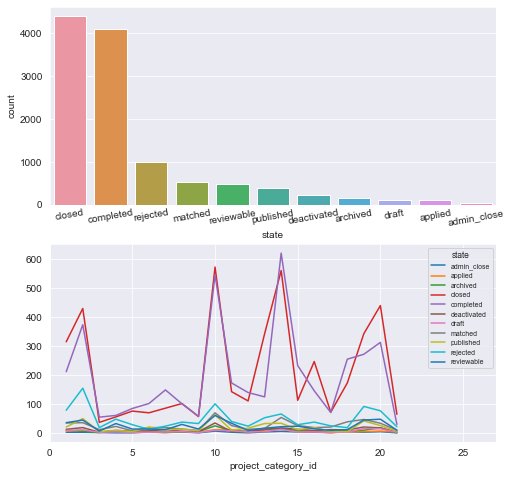

In [381]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, axes = plt.subplots(2, 1)

cntplot = sns.countplot(data=project, x='state', order=project['state'].value_counts(ascending=False).index,
                                                                                 ax=axes[0])
#cntplot.set_xticklabels(cntplot.get_xticks(), rotation=30)
cntplot.tick_params(axis='x', labelrotation=10, direction='in')

prj_crs = pd.crosstab(columns=project['state'], index=project['project_category_id'], margins=False)
lnplot = prj_crs.plot.line(ax=axes[1])
lnplot.legend(title='state', loc='upper right', title_fontsize='small', 
              fontsize='x-small')
lnplot.set(xlim=[0, 27])


#### Project distribution across project state and session numbers

<AxesSubplot:xlabel='session_cnt', ylabel='state'>

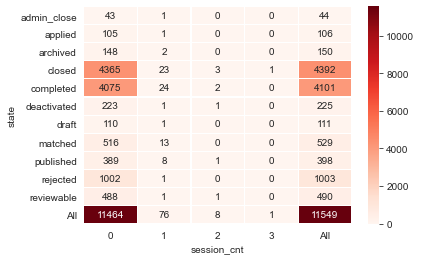

In [382]:
plt.rcParams['figure.figsize'] = (6, 4)
state_session_pvt = project.pivot_table(values='id', index='state', columns='session_cnt', aggfunc='count',
                                       fill_value=0, margins=True)
sns.heatmap(state_session_pvt, linewidth=0.1, robust=False, 
            cmap='Reds', annot=True, fmt='d')

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='have_session', ylabel='Probability'>

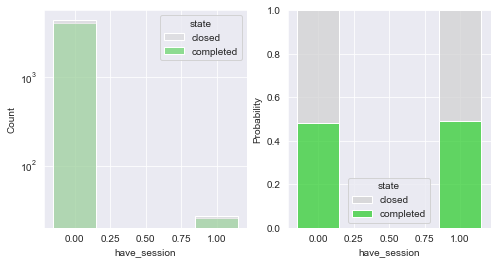

In [383]:
pal = {'closed': 'lightgrey', 'completed': 'limegreen'}

plt.rcParams['figure.figsize'] = (8, 4)
project['have_session'] = project.session_cnt>0
df = project.loc[project.state.isin(['completed', 'closed'])]


fig, axes = plt.subplots(1, 2)
# number of projects in each state with absolute count value
#sns.countplot(x='have_session', data=df, hue='state', ax=axes[0])
sns.histplot(x='have_session', data=df, hue='state', stat='count', log_scale=(False, True),
            discrete=True, shrink=0.3, ax=axes[0], palette=pal)
# Number of projects in each state with a ratio to the total project numbers
sns.histplot(x='have_session', data=df, hue='state', stat='probability', multiple='fill', 
             discrete=True, shrink=0.3, ax=axes[1], palette=pal)

##### Project distribution across session status

In [384]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (8, 4)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


[(-0.5, 2.0)]

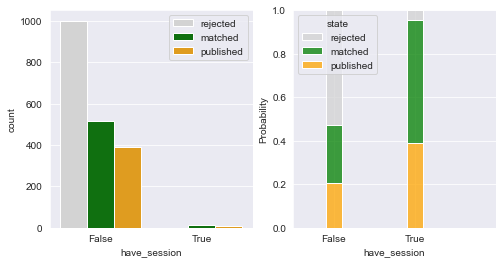

In [385]:
fig, axes = plt.subplots(1, 2)
pal = dict({'rejected': 'lightgrey', 'published': 'orange', 'matched': 'green'})
kw = dict(edgecolor='w', linewidth= 1)

df = project.loc[project.state.isin(['published', 'matched', 'rejected'])]
cntplot = sns.countplot(x='have_session', hue='state', data=df, ax=axes[0], palette=pal, **kw)
cntplot.legend(loc='upper right')

histplot = sns.histplot(data=df, x='have_session', hue='state', stat='probability', multiple='fill',
                   ax=axes[1], discrete=True, shrink=0.2, palette=pal, **kw)
histplot.set_xticks([0, 1])
histplot.set_xticklabels(['False', 'True'])
histplot.set(xlim=[-0.5, 2])

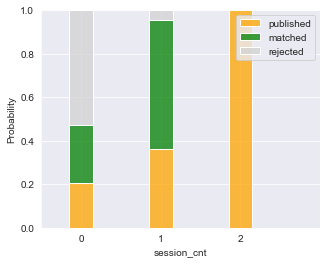

In [386]:
plt.rcParams['figure.figsize'] = (5, 4)

histplt = sns.histplot(data=df, x='session_cnt', hue='state', stat='probability',
              multiple='fill', discrete=True, palette=pal, shrink=0.3)
histplt.set_xticks([0, 1, 2])
histplt.set_xticklabels(['0', '1', '2'])
histplt.set(xlim=[-0.5, 3])
histplt.legend(labels=['published', 'matched', 'rejected'], loc='upper right')


##### Project distribution across project inquiry status

In [387]:
project['have_inquiry'] = project.project_inquiries_count>0
#project.have_inquiry = project.have_inquiry.astype(int)
pal = {'closed': 'lightgrey', 'completed': 'limegreen'}
plt.rcParams['figure.figsize'] = (8, 4)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


[Text(0.5, 1.0, 'Ratio of Project States across Inquiries')]

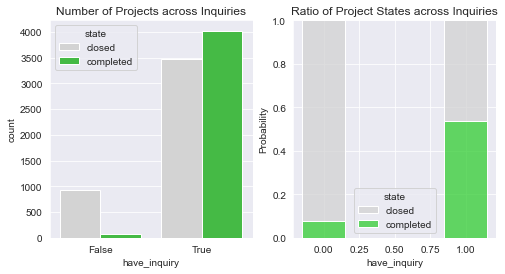

In [388]:
kw = dict(edgecolor='w', linewidth=1)

fig, axes = plt.subplots(1, 2)
df = project.loc[project.state.isin(['closed', 'completed'])]

cntplot = sns.countplot(x='have_inquiry', hue='state', data=df, palette=pal, ax=axes[0])
cntplot.set(title='Number of Projects across Inquiries')
hist = sns.histplot(x='have_inquiry', hue='state', data=df, ax=axes[1], palette=pal,
             stat='probability', multiple='fill', discrete=True, binwidth=1, shrink=0.3, **kw)
hist.set(title='Ratio of Project States across Inquiries')

##### Project distribution across project inquiry numbers

In [389]:
df = project.loc[project.state.isin(['completed', 'closed'])]
# Create a pivot_table to find upper threshold for inquiry number
# - pick 13 which has 9 records. Too few observations might bias the result
df.pivot_table(values='id', columns='state', index='project_inquiries_count', 
               aggfunc='count', fill_value=0, margins=True)
hthresh = 13.5

[(-1.0, 13.5)]

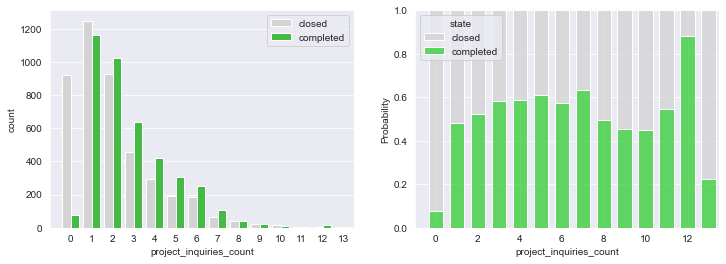

In [390]:
plt.rcParams['figure.figsize'] = (12, 4)
fig, axes = plt.subplots(1, 2)

cntplot = sns.countplot(x='project_inquiries_count', hue='state', data=df,
                        palette=pal, ax=axes[0])
axes[0].legend(loc='upper right')
cntplot.set(xlim=(-1, hthresh))

hst = sns.histplot(x='project_inquiries_count', hue='state', data=df, ax=axes[1],
            stat='probability', multiple='fill', discrete=True, palette=pal, shrink=0.7, **kw)
hst.set(xlim=(-1, hthresh))    